In [5]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [6]:
#create a set of longitude and Latitude values
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
#pack both lats and long as a pair
lat_lngs=zip(lats,lngs)
lat_lngs

In [41]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

14.939643818248683 88.41860512307576
-80.53338909418684 -71.8049300220668
68.7016317701513 70.7123516381968
19.027976993915132 20.318692242484474
-74.2428874960821 49.29800333534283
38.2387050932482 44.31930561735052
-36.948912568224294 -9.559762820992205
46.92494115585734 -81.35204950897574
53.9596425648721 -41.22110336597888
-35.80915449074969 89.11546047757062
19.381104854719524 -78.09064086276882
-89.6489889146687 -47.09411914313229
-60.82870539215392 -57.63851965972615
24.162078878269696 39.38169066404228
-11.448301403392577 28.533006610243163
16.97948211796067 -72.40125399293667
69.31904827399623 -5.444272518775392
-1.204091533218815 70.46778916548612
-54.904980905921285 -3.1551347942997268
-31.9520056018915 22.250198317934277
-8.134975124480178 -80.33271797698825
-43.8332446236586 27.09058504877592
54.599422310605405 20.009101860465634
-67.80246650096404 7.0015065368885985
38.804587862719444 88.8193781887422
8.604921733652418 -66.82067208123144
72.01283442493826 43.4667422632101

-23.742807272834483 16.471127631000257
42.66226287323482 46.99624465747931
-24.609729512642744 71.89820093129157
-77.2282563411481 -67.93628088924243
31.480615108192552 -39.32490206537083
-4.996663835879204 -6.599986277563801
9.638705068562487 -44.36509030432271
-16.28780669905011 72.51879154437424
81.1516036609203 -9.87020902521705
3.8621398448078565 25.125802770904286
-67.53731515261953 16.04306976803639
-60.29364637619594 -58.490681801411014
-73.41429495128429 -9.160770895731446
4.040578436468735 79.74353563991497
60.08481207879197 -51.07332818068539
-42.89050438491054 83.45046369262039
-35.17680740693536 -71.12600408109986
59.799416622820786 -75.97407151349869
67.57120274237724 -72.43246748941718
-55.83860244074535 52.93183211984328
0.6264999858658484 65.17393987903813
-23.92858041055223 39.07410873015101
43.25960980105879 88.77405257634757
46.58002316434573 -56.71109263505285
3.696751114243682 -76.79695560161636
-33.199339450524114 88.085556077814
-73.10256355973121 2.715835461039

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [11]:
#import the requests library
import requests
#import the API key
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=945fbd1889f2a43a87541db8c3b1fd2f


In [13]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port blair
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | yar-sale
Processing Record 4 of Set 1 | faya
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | salmas
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | capreol
Processing Record 9 of Set 1 | nanortalik
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | niquero
Processing Record 12 of Set 1 | umm lajj
Processing Record 13 of Set 1 | mansa
Processing Record 14 of Set 1 | pedernales
Processing Record 15 of Set 1 | klaksvik
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | chicama
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | baltiysk
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set 1 | korla
Pr

City not found. Skipping...
Processing Record 33 of Set 4 | kruisfontein
Processing Record 34 of Set 4 | dikson
Processing Record 35 of Set 4 | sargatskoye
Processing Record 36 of Set 4 | usinsk
Processing Record 37 of Set 4 | roald
Processing Record 38 of Set 4 | nova borova
Processing Record 39 of Set 4 | andevoranto
City not found. Skipping...
Processing Record 40 of Set 4 | codrington
Processing Record 41 of Set 4 | baghdad
Processing Record 42 of Set 4 | los llanos de aridane
Processing Record 43 of Set 4 | hosur
Processing Record 44 of Set 4 | axim
Processing Record 45 of Set 4 | pichayevo
Processing Record 46 of Set 4 | vilhena
Processing Record 47 of Set 4 | venezuela
Processing Record 48 of Set 4 | mikhaylovka
Processing Record 49 of Set 4 | bandarbeyla
Processing Record 50 of Set 4 | namibe
Processing Record 1 of Set 5 | souillac
Processing Record 2 of Set 5 | henties bay
Processing Record 3 of Set 5 | mugumu
Processing Record 4 of Set 5 | clarence town
Processing Record 5 of

City not found. Skipping...
Processing Record 24 of Set 8 | mtwara
Processing Record 25 of Set 8 | san rafael
Processing Record 26 of Set 8 | ponta delgada
Processing Record 27 of Set 8 | terrak
Processing Record 28 of Set 8 | svetlyy
Processing Record 29 of Set 8 | kiruna
Processing Record 30 of Set 8 | calderitas
Processing Record 31 of Set 8 | constitucion
Processing Record 32 of Set 8 | rovaniemi
Processing Record 33 of Set 8 | nsanje
Processing Record 34 of Set 8 | macusani
Processing Record 35 of Set 8 | muisne
Processing Record 36 of Set 8 | pailon
Processing Record 37 of Set 8 | garoua
Processing Record 38 of Set 8 | sorgun
Processing Record 39 of Set 8 | ankazobe
Processing Record 40 of Set 8 | meulaboh
Processing Record 41 of Set 8 | matara
Processing Record 42 of Set 8 | ouesso
Processing Record 43 of Set 8 | labytnangi
Processing Record 44 of Set 8 | beloha
Processing Record 45 of Set 8 | buqayq
City not found. Skipping...
Processing Record 46 of Set 8 | wick
Processing Rec

City not found. Skipping...
Processing Record 14 of Set 12 | kapuskasing
Processing Record 15 of Set 12 | ugoofaaru
Processing Record 16 of Set 12 | lunenburg
Processing Record 17 of Set 12 | otavi
Processing Record 18 of Set 12 | djambala
Processing Record 19 of Set 12 | adilcevaz
Processing Record 20 of Set 12 | pilar
Processing Record 21 of Set 12 | eravur
Processing Record 22 of Set 12 | kashan
Processing Record 23 of Set 12 | viedma
Processing Record 24 of Set 12 | cuxhaven
Processing Record 25 of Set 12 | usta muhammad
Processing Record 26 of Set 12 | gornopravdinsk
Processing Record 27 of Set 12 | kouango
Processing Record 28 of Set 12 | cordoba
Processing Record 29 of Set 12 | georgiyevskoye
Processing Record 30 of Set 12 | plavinas
Processing Record 31 of Set 12 | vila franca do campo
Processing Record 32 of Set 12 | pag
Processing Record 33 of Set 12 | gazli
Processing Record 34 of Set 12 | palora
Processing Record 35 of Set 12 | hakvik
City not found. Skipping...
Processing 

In [15]:
len(city_data)

566

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Blair,11.6667,92.7500,78.84,94,75,1.14,IN,2022-09-27 18:51:31
1,Ushuaia,-54.8000,-68.3000,53.22,66,40,40.29,AR,2022-09-27 18:51:31
2,Yar-Sale,66.8333,70.8333,28.72,80,97,10.02,RU,2022-09-27 18:51:32
3,Faya,18.3851,42.4509,70.32,28,1,6.26,SA,2022-09-27 18:51:33
4,Port Alfred,-33.5906,26.8910,63.18,99,100,8.01,ZA,2022-09-27 18:51:33
5,Salmas,38.1973,44.7653,62.80,34,0,3.56,IR,2022-09-27 18:51:34
6,Jamestown,42.0970,-79.2353,56.52,92,100,11.50,US,2022-09-27 18:50:56
7,Capreol,46.7060,-80.9225,52.27,76,75,14.97,CA,2022-09-27 18:51:35
8,Nanortalik,60.1432,-45.2371,46.35,92,88,8.52,GL,2022-09-27 18:51:35
9,Busselton,-33.6500,115.3333,50.13,88,4,9.31,AU,2022-09-27 18:51:36


In [18]:
new_columns = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_columns]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Blair,IN,2022-09-27 18:51:31,11.6667,92.7500,78.84,94,75,1.14
1,Ushuaia,AR,2022-09-27 18:51:31,-54.8000,-68.3000,53.22,66,40,40.29
2,Yar-Sale,RU,2022-09-27 18:51:32,66.8333,70.8333,28.72,80,97,10.02
3,Faya,SA,2022-09-27 18:51:33,18.3851,42.4509,70.32,28,1,6.26
4,Port Alfred,ZA,2022-09-27 18:51:33,-33.5906,26.8910,63.18,99,100,8.01


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

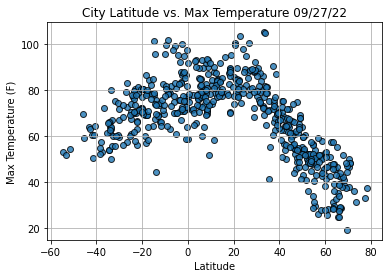

In [21]:
#import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

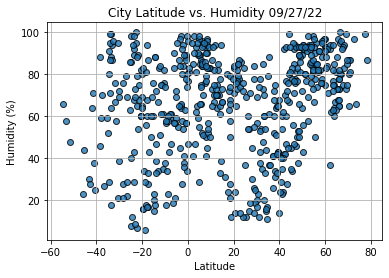

In [22]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

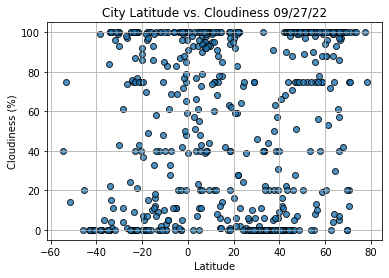

In [23]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

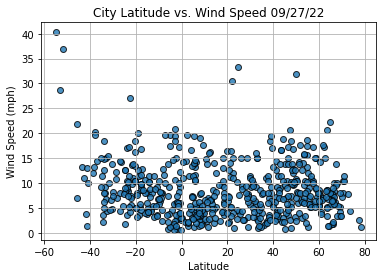

In [24]:
# Build the scatter plot for latitude vs. Wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [25]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
        # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
 # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
index13 = city_data_df.loc[13]
index13

City                   Pedernales
Country                        DO
Date          2022-09-27 18:51:41
Lat                       18.0384
Lng                       -71.744
Max Temp                    87.26
Humidity                       63
Cloudiness                     63
Wind Speed                   4.38
Name: 13, dtype: object

In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

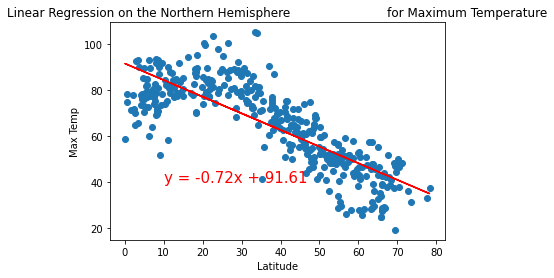

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

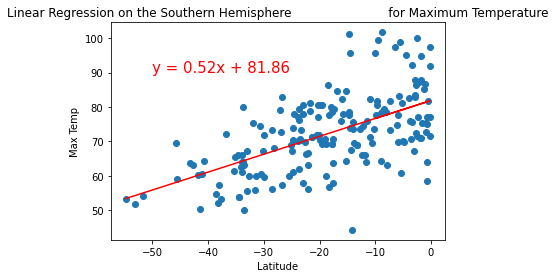

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

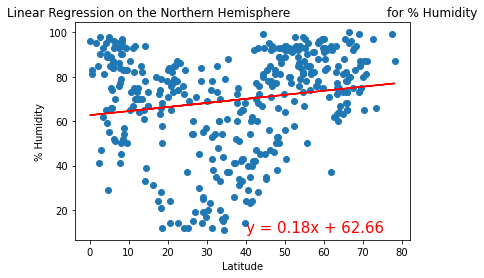

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

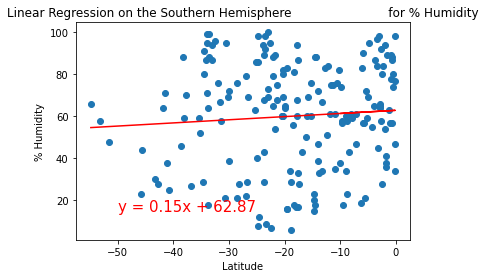

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

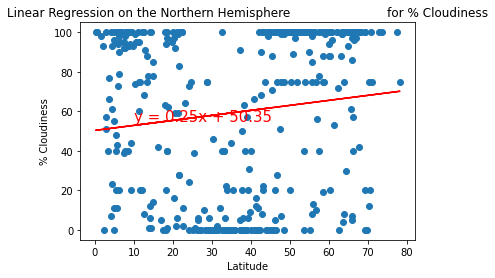

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

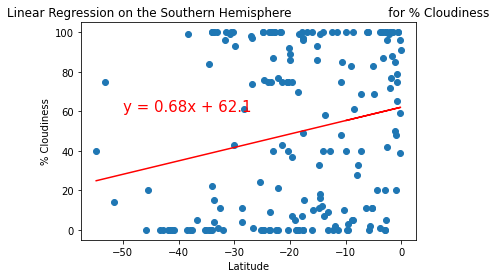

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

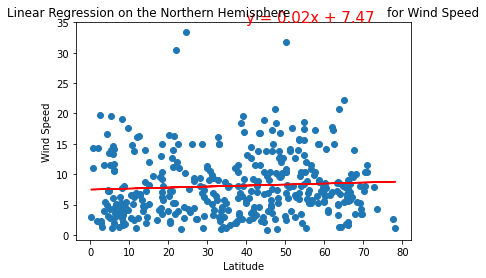

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

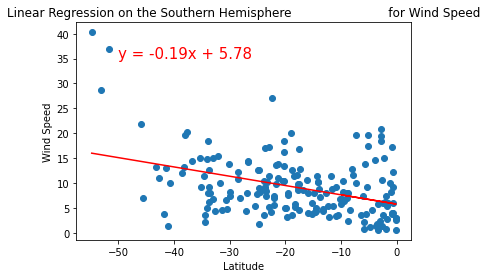

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))